# Kyle Corcoran

# Computational Project 2

# September 17, 2018

# Introduction

Lissajous figures are insteresting curves, sometimes called Lissajous curves or Bowditch curves, and were heavily studied by Nathaniel Bowditch in the 1800's.  According to John Taylor, these paths come about as a result of periodic or harmonic motion (2005).  In this project we seek to model these figures and predict the resultant path by the ratio of the two angular frequencies.  

## Package Importing and Functions for plots

Outside of the standard modules, such as matplotlib and numpy, that we call, I have also included a statement that will allow us to plot in three dimensions.  Also, I have imported the functions contained in the ode.py file written by Jay Wang for numerical integrations of odes that explain the motion of lissajous figures. (This .py file is located in the git repo)

In [4]:
#importing packages
import matplotlib.pyplot as plt
import numpy as np
import ode
from mpl_toolkits import mplot3d #for 3d plotting

In [5]:
%matplotlib notebook 

I have added a few plotting functions that will help us to run stuff without having to copy and paste stuff all the time.  I have other functions later in the code that are near sections they belong to.

In [6]:
def plot2d(xs,ys):   #takes in x and y data and makes a plot with labels, saves some copying and pasting
    fig = plt.figure()
    plt.plot(xs,ys)
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')

In [7]:
def plot3d(xs,ys,zs):  #same thing as above with 3 dimensions
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(xs,ys,zs)
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('z [m]')

## Theory for 2-D harmonic oscillator - Numerical Integration using RK4

We can reduce the error at longer run times for the system if we use numerical integration techniques such as the RK4 method.  To do this, we need a model for a differential equation.  Here we have a system with a x and y point as well a x and y velocity to start, all of which we will give initial values as follows:

$$ x = 0, y = 0 $$
$$ v_{x} = 1, v_{y} = 1. $$

Now to set up a differential equation to integrate, we want the derivative of each of these components, so we have:

$$ \frac{dx}{dt} = v_{x}, \frac{dy}{dt} = v_{y} $$
$$ \frac{dv_{x}}{dt} = a_{x}, \frac{dv_{y}}{dt} = a_{y}. $$

Through Newton's second law we know:
$$ \vec{F} = m\vec{a}, $$
so we can rewrite our model as:

$$ \frac{dx}{dt} = v_{x}, \frac{dy}{dt} = v_{y} $$
$$ \frac{dv_{x}}{dt} = \frac{\vec{F}_{net,x}}{m}, \frac{dv_{y}}{dt} = \frac{\vec{F}_{net,y}}{m}. $$

We also know what our net force is, so we can again rewrite our model as:
$$ \frac{dx}{dt} = v_{x}, \frac{dy}{dt} = v_{y} $$
$$ \frac{dv_{x}}{dt} = -\omega_1^{2}x, \frac{dv_{y}}{dt} = -\omega_2^{2}y. $$

We can now use the RK4 method to numerically integrate, and obtain a Lissajous figure.

## Numerical integration in 2-D

In [8]:
def liss2d(y0,t):  #numerical model to be integrated
    dydt = np.zeros(4)
    dydt[0] = y0[2]
    dydt[1] = y0[3]
    dydt[2] = -w1**2*y0[0]
    dydt[3] = -w2**2*y0[1]
    return dydt

The function below takes in the mass [kg] (a) and omega values (b, c - [1/s]) for the spring, as well as initial x [m], y [m], x-velocity [m/s], and y-velocity [m/s] parameters.  It then uses the initial time (t [s]), time step (dt [s]), and length of time to run over (end_t [s]) to integrate the model given by the above function and the initial parameters.  Then it plots the lissajous figure so you can see what the model created.

In [13]:
def model_figure2d(a,b,c,x,y,vx,vy,t,dt,end_t):
    global m; m=a; global w1; w1=b; global w2; w2=c 
    y0 = [x,y,vx,vy] #initial vector
    ts = [] #time list
    xs = []; ys = []; vxs = []; vys = [] #lists for all parameters to be stored
    
    while t<end_t:
        ts.append(t)   #----------------------------appending
        xs.append(y0[0]); ys.append(y0[1])     #--- values
        vxs.append(y0[2]); vys.append(y0[3])   #--- for plotting

        #update the momentum and positions
        y1 = ode.RK4(liss2d,y0,t,dt)

        for i in range(len(y1)): #reset y0 to the new vector
            y0[i] = y1[i]

        t+=dt   #update the time
    
    plot2d(xs,ys)

<IPython.core.display.Javascript object>


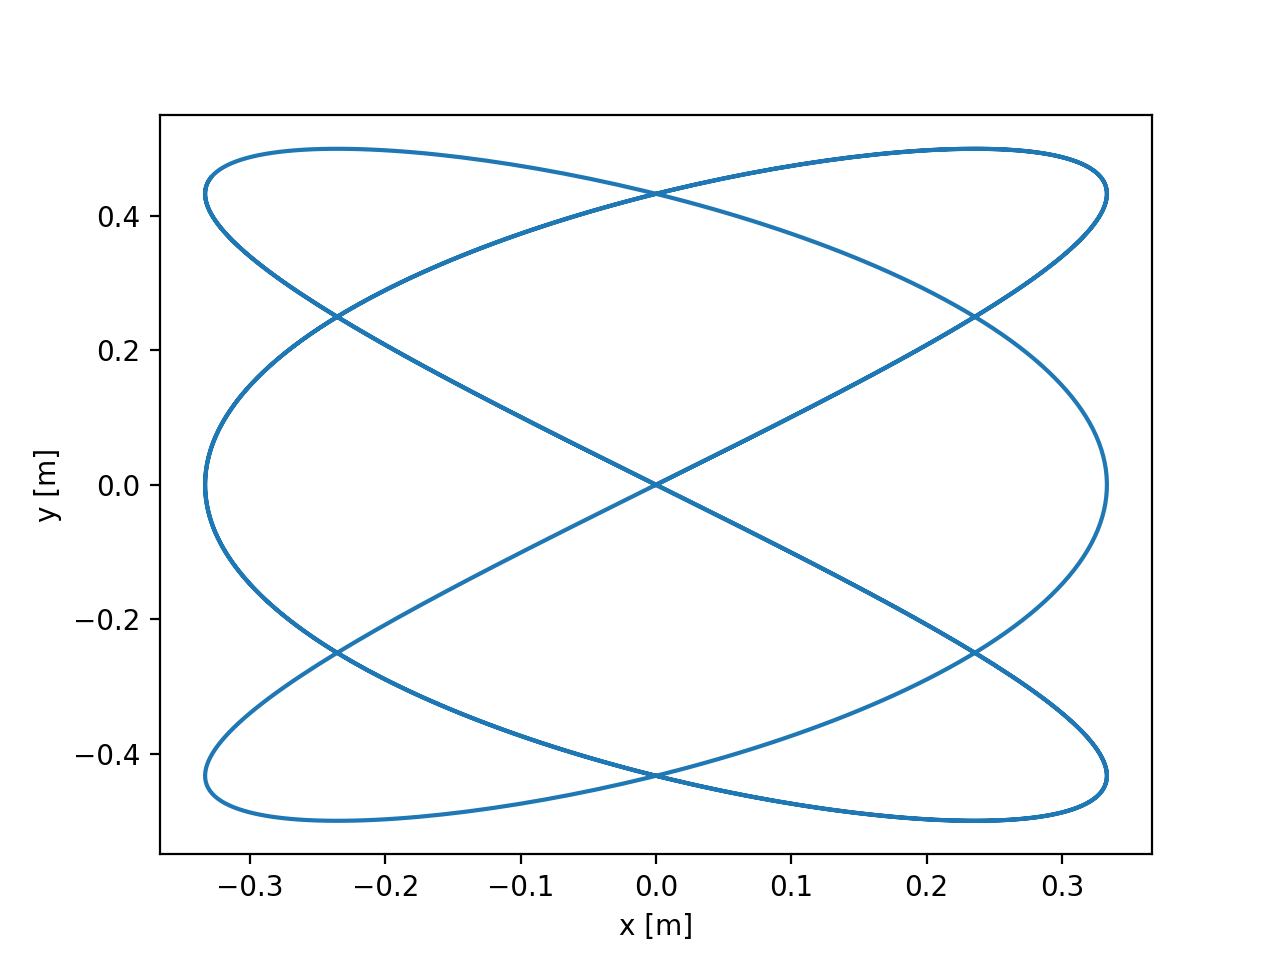

In [14]:
model_figure2d(2,3,2,0,0,1,1,0,0.01,10)

## Method for Lissajous figure determination

The velocities really only affect the amplitude of the figures, i.e. how large the numbers of the figure get, but the initial positions can make the figures skew which is kind of cool; however, the ratio  of $\frac{\omega_{1}}{\omega_{2}}$ is the most important.

If you play with the value of the $\omega$'s, and you look at the ratio of $\frac{\omega_{1}}{\omega_{2}}$, you can determine what the lissajous figure would look like before you even plot it!  

As a rule of the thumb, the individual $\omega$'s will correspond to the number of lobes on each axis; however, they do not correspond directly.  For example, in the previous plot we had $\omega_{1} = 3$ and this corresponds to the $x$-axis in the calculation, and $\omega_{1} = 2$ which corresponds to the $y$-axis.  When you plot it, you can count the three lobes on the $y$-axis and two on the $x$-axis!  This means the ratio of the omegas tell you how many lobes will overlap in each plane. 

However, this is not always the case.  If the ratio of $\frac{\omega_{1}}{\omega_{2}}$ is an integer number such as 2, 3, or 4, the shape will be defined by that ratio.  For even numbers, there will be the same number of loops as the integer the ratio gives you, and for odd numbers, you will get a squiggly line with N-1 humps as your integer.  I have shown an example of the even, odd, and rational number ratios below.

## Even

<IPython.core.display.Javascript object>


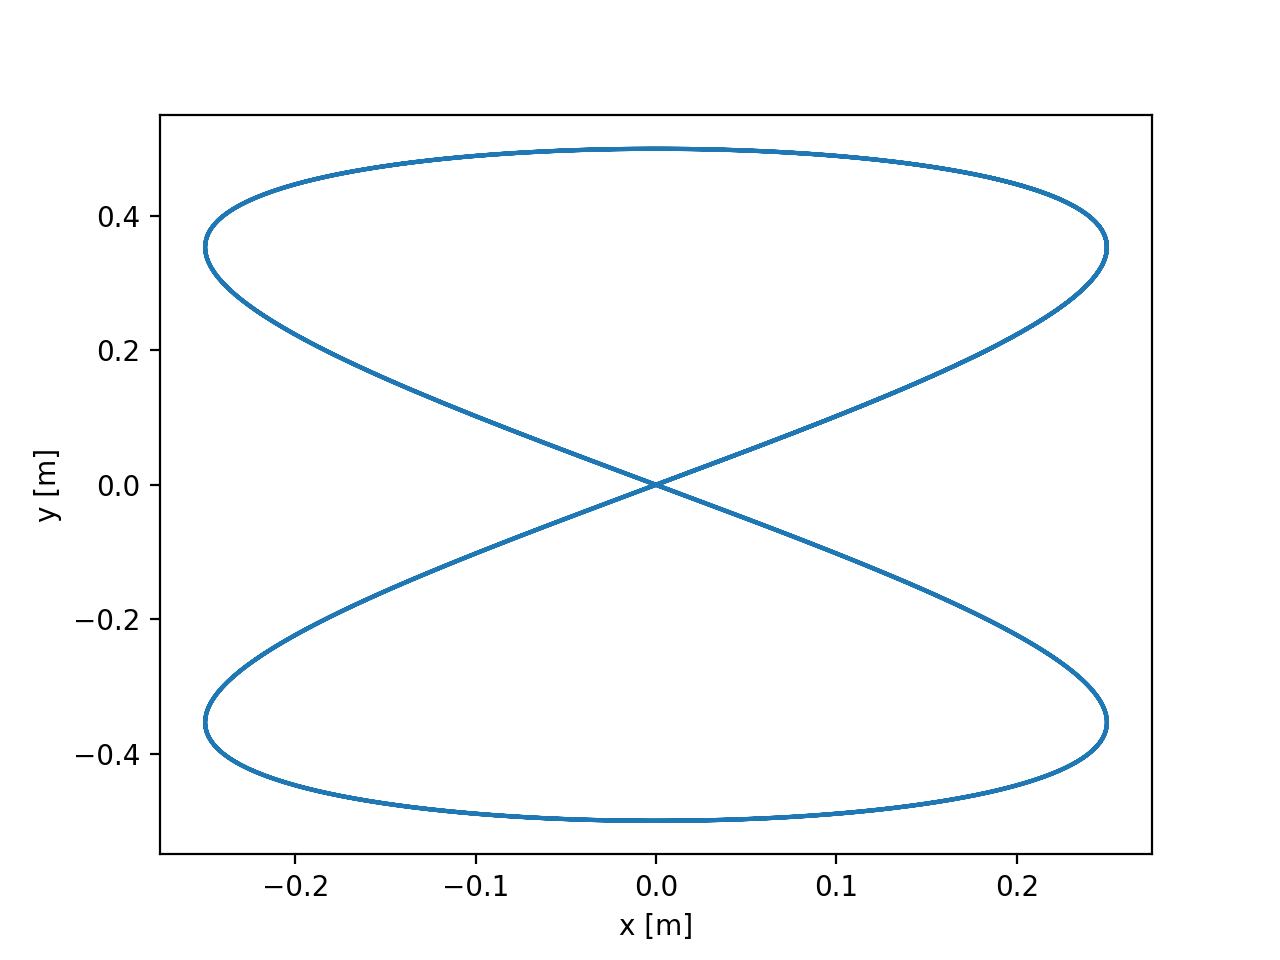

In [15]:
model_figure2d(2,4,2,0,0,1,1,0,0.01,10)

## Odd

<IPython.core.display.Javascript object>


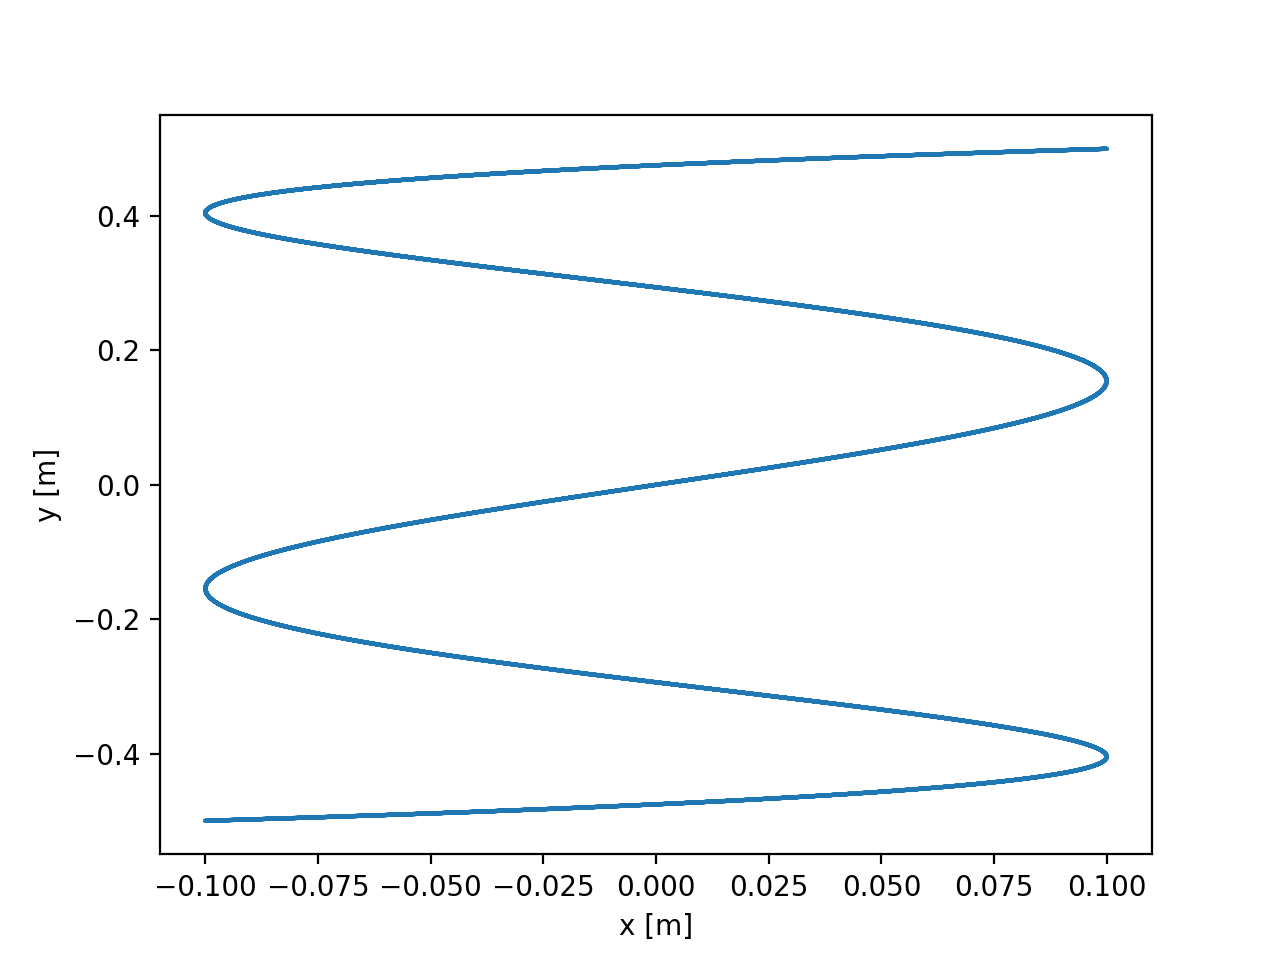

In [16]:
model_figure2d(2,10,2,0,0,1,1,0,0.01,10)

## Rational number

<IPython.core.display.Javascript object>


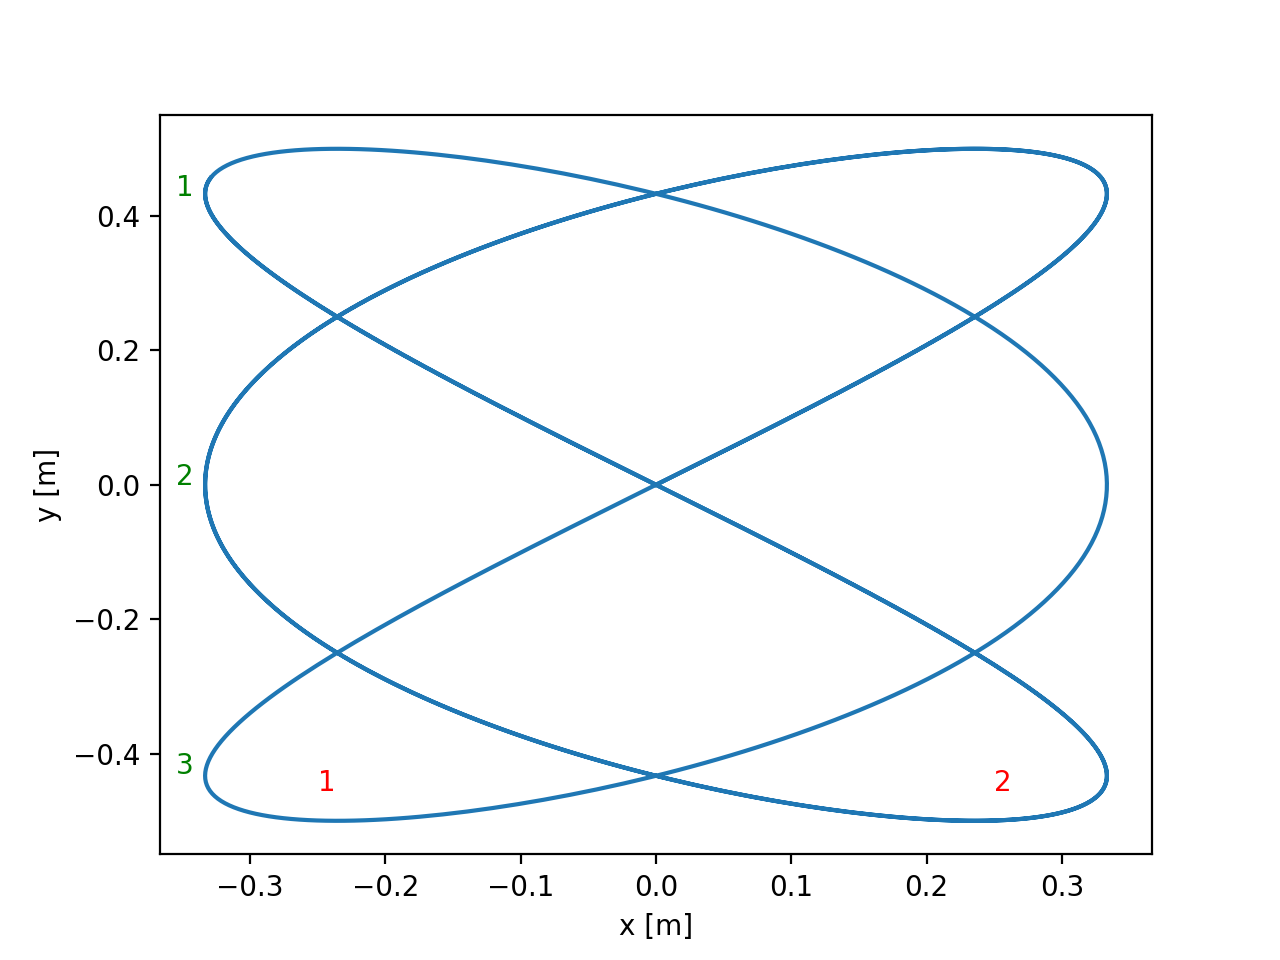

In [17]:
model_figure2d(2,3,2,0,0,1,1,0,0.01,10)

plt.text(-0.355,0.43,'1',color = 'green');plt.text(-0.355,0.0,'2',color = 'green');plt.text(-0.355,-0.43,'3',color = 'green')
plt.text(-0.25,-0.455,'1',color = 'red');plt.text(0.25,-0.455,'2',color = 'red')

I'll do one more example.  Let's say $\omega_{1} = 4$ and $\omega_{2} = 3$.  The Lissajous figure would have 4 lobes on the $y$-axis and 3 on the $x$-axis.

<IPython.core.display.Javascript object>


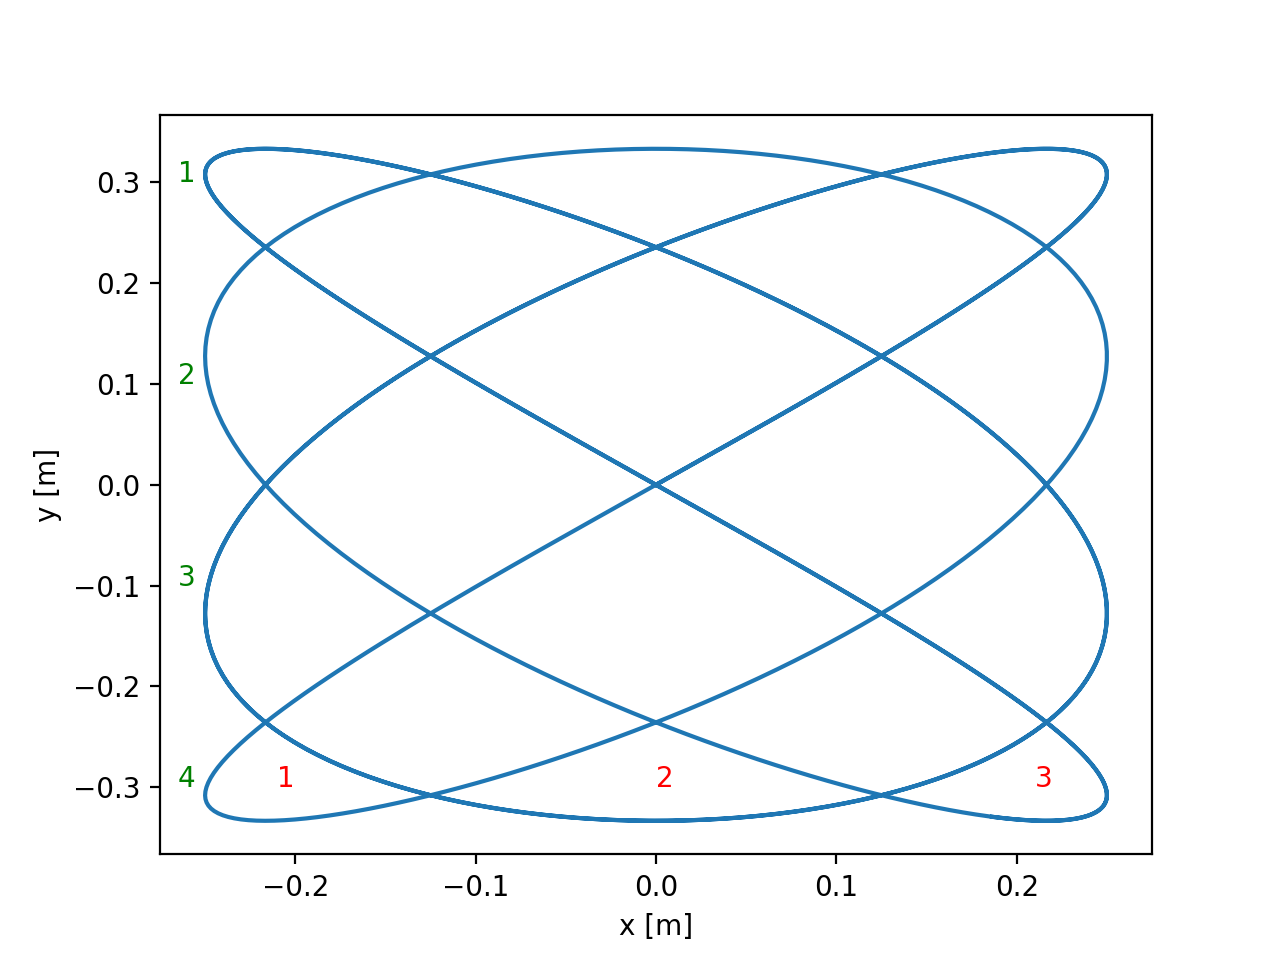

In [19]:
model_figure2d(2,4,3,0,0,1,1,0,0.01,10)

plt.text(-0.265,0.3,'1',color = 'green');plt.text(-0.265,0.1,'2',color = 'green');plt.text(-0.265,-0.1,'3',color = 'green');plt.text(-0.265,-0.3,'4',color = 'green')
plt.text(-0.21,-0.3,'1',color = 'red');plt.text(0.0,-0.3,'2',color = 'red');plt.text(0.21,-0.3,'3',color = 'red')

## Quiz time

What will the figure look like if I run the code below?

<IPython.core.display.Javascript object>


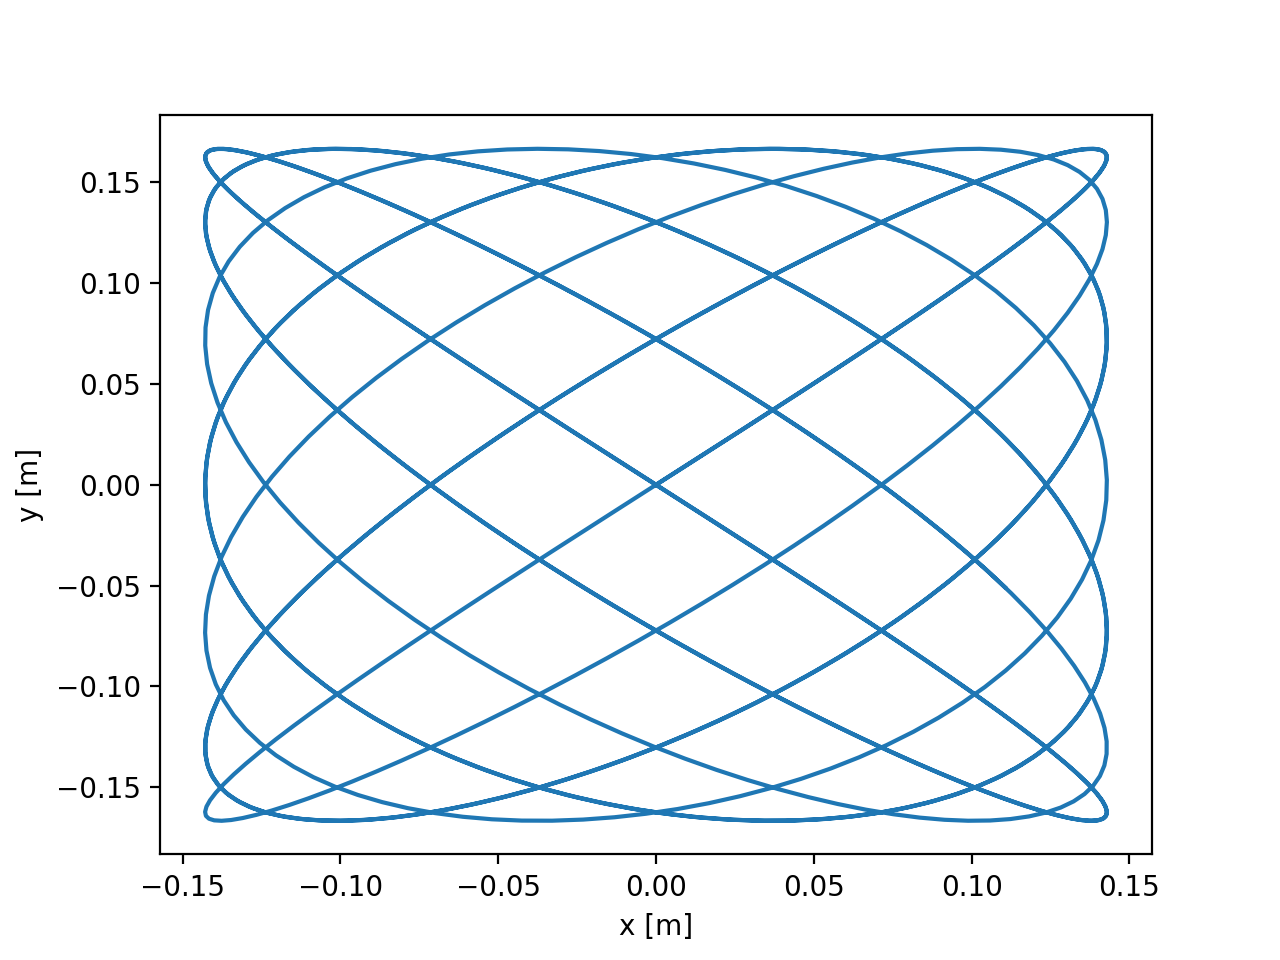

In [20]:
model_figure2d(2,7,6,0,0,1,1,0,0.01,10)

# TIME FOR 3-D!

Use the interactive plots in the Notebook to look at the cool figures by rotating them around!

## Theory for 3-D harmonic oscillator - Numerical Integration with RK4

Let's reduce the error at longer run times again for the system using the RK4 method, but now in three dimensions.  To do this, we need a model for a differential equation.  Here we have a system with a x and y point as well a x and y velocity to start, all of which we will give initial values as follows:

$$ x = 0, y = 0, z = 0 $$
$$ v_{x} = 1, v_{y} = 1, v_{z} = 1. $$

Now to set up a differential equation to integrate, we want the derivative of each of these components, so we have:

$$ \frac{dx}{dt} = v_{x}, \frac{dy}{dt} = v_{y}, \frac{dz}{dt} = v_{z} $$
$$ \frac{dv_{x}}{dt} = a_{x}, \frac{dv_{y}}{dt} = a_{y}, \frac{dv_{z}}{dt} = a_{z}. $$

Through Newton's second law we know:
$$ \vec{F} = m\vec{a}, $$
so we can rewrite our model as:

$$ \frac{dx}{dt} = v_{x}, \frac{dy}{dt} = v_{y}, \frac{dz}{dt} = v_{z} $$
$$ \frac{dv_{x}}{dt} = \frac{\vec{F}_{net,x}}{m}, \frac{dv_{y}}{dt} = \frac{\vec{F}_{net,y}}{m}, \frac{dv_{z}}{dt} = \frac{\vec{F}_{net,z}}{m}. $$

We also know what our net force is, so we can again rewrite our model as:
$$ \frac{dx}{dt} = v_{x}, \frac{dy}{dt} = v_{y}, \frac{dz}{dt} = v_{z} $$
$$ \frac{dv_{x}}{dt} = -\omega_1^{2}x, \frac{dv_{y}}{dt} = -\omega_2^{2}y, \frac{dv_{z}}{dt} = -\omega_2^{2}z. $$

We can now use the RK4 method to numerically integrate, and obtain a Lissajous figure in each plane!

## Numerical integration in 3-D

In [21]:
def liss3d(y0,t):  #model with our added z-parameter
    dydt = np.zeros(6)
    dydt[0] = y0[3]
    dydt[1] = y0[4]
    dydt[2] = y0[5]
    dydt[3] = -w1**2*y0[0]
    dydt[4] = -w2**2*y0[1]
    dydt[5] = -w3**2*y0[2]
    return dydt

In [22]:
def model_figure3d(a,b,c,d,x,y,z,vx,vy,vz,t,dt,end_t):  #same as before with added z-axis info
    global m; m=a; global w1; w1=b; global w2; w2=c; global w3; w3=d
    y0 = [x,y,z,vx,vy,vz] #initial vector
    ts = [] #time list
    xs = []; ys = []; zs = []; vxs = []; vys = []; vzs = [] #lists for all parameters to be stored
    
    while t<end_t:
        ts.append(t)   #---------------------------------------------- appending
        xs.append(y0[0]); ys.append(y0[1]); zs.append(y0[2])     #---- values
        vxs.append(y0[3]); vys.append(y0[4]); vzs.append(y0[5])   #--- for plotting

        #update the momentum and positions
        y1 = ode.RK4(liss3d,y0,t,dt)

        for i in range(len(y1)): #reset y0 to the new vector
            y0[i] = y1[i]

        t+=dt   #update the time
    
    plot3d(xs,ys,zs)

<IPython.core.display.Javascript object>


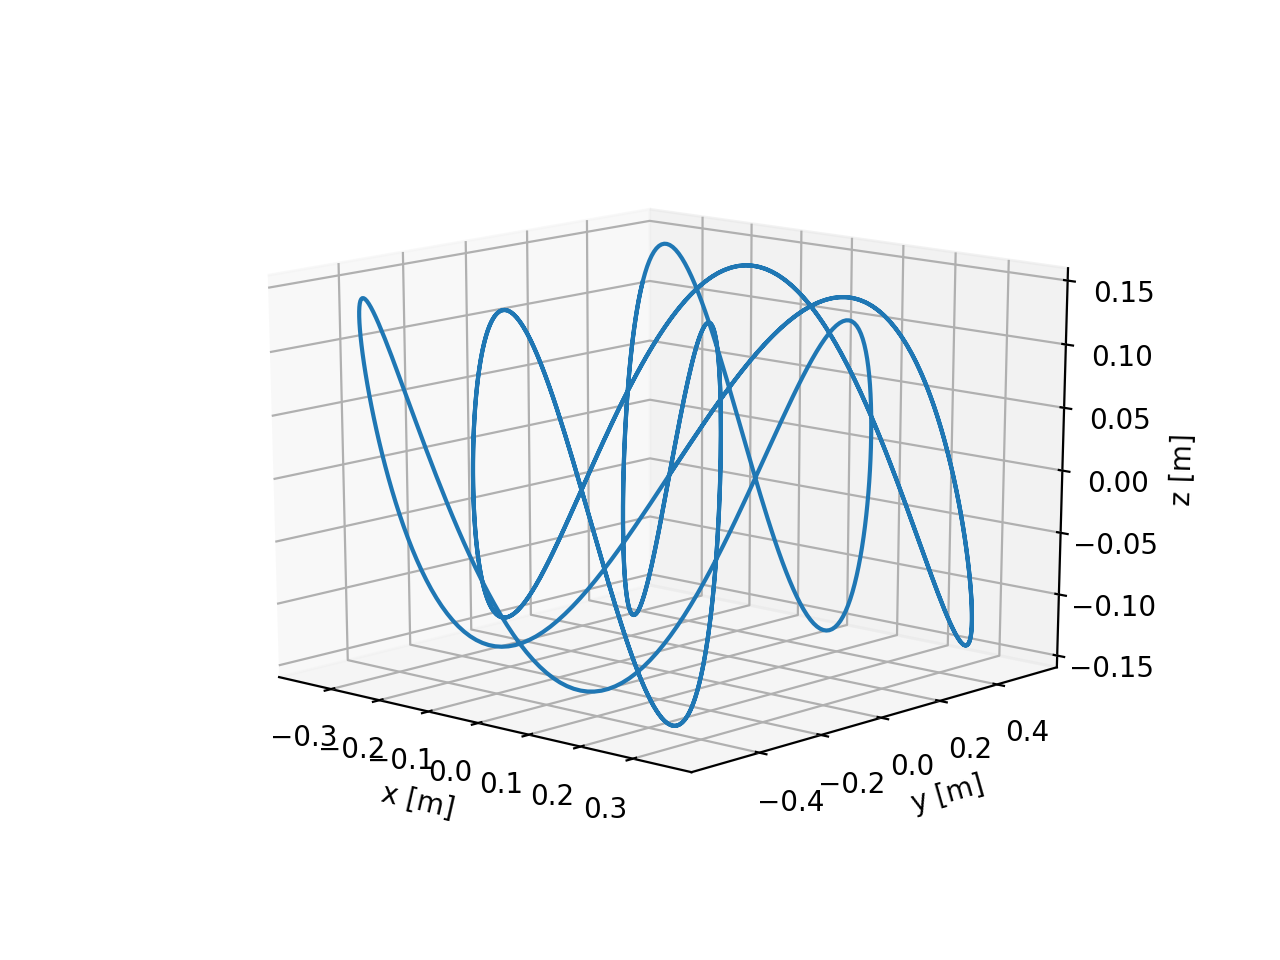

In [23]:
model_figure3d(1,3,2,7,0,0,0,1,1,1,0,0.01,10)

These 3-D curves are cool because you can look into each plane to see the Lissajous figures you would see the same figures as you would expect in 2-D, dictated by the method described earlier!

Here are some interesting $\omega$ combos to try!
1. 5,2,9
2. 5,2,4
3. 2,7,4

## Applications

Some things that people are doing with these are to make optical encoders (Ye, 2018), interferometry (Zhai, 2018), and some things studying the Milky Way.  You can also create them on oscilliscopes, which is pretty cool.  I think it would be interesting to add a lab into an introductory mechanics class where you could track the the Lissajous figures with tracker and try to experimentally find these as an assignment.

# Summary
We wanted to investigate numerical models of Lissajous figures.  We created a differential model that we then integrated using RK4, and we described a way to predict the resultant figure based on the initial parameters.  I hope that you have as much fun playing with the initial parameters as I did!

# References

Taylor, John 2005, *Classical Mechanics*, 172

Zhai Z. et al. 2018, Optics Communications, 429, 144-151

Ye, G. el al. 2018, Optics Communications, 411, 126-132